In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

This is the description of the dictionary used for each module

Each module has a different position and orientation described in the detectors
file. A local, right-handed coordinate system is defined on each sensitive
surface such that the first two coordinates u and v are on the sensitive surface
and the third coordinate w is normal to the surface. The orientation and
position are defined by the following transformation

pos_xyz = rotation_matrix * pos_uvw + translation
that transform a position described in local coordinates u,v,w into the
equivalent position x,y,z in global coordinates using a rotation matrix and
an translation vector (cx,cy,cz).

* volume_id: numerical identifier of the detector group.
* layer_id: numerical identifier of the detector layer inside the
group.
* module_id: numerical identifier of the detector module inside
the layer.
* cx, cy, cz: position of the local origin in the described in the global
coordinate system (in millimeter).
* rot_xu, rot_xv, rot_xw, rot_yu, …: components of the rotation matrix
to rotate from local u,v,w to global x,y,z coordinates.
* module_t: half thickness of the detector module (in millimeter).
* module_minhu, module_maxhu: the minimum/maximum half-length of the
module boundary along the local u direction (in millimeter).
* module_hv: the half-length of the module boundary along the local v
direction (in millimeter).
* pitch_u, pitch_v: the size of detector cells along the local u and v
direction (in millimeter).


In [2]:
import sys
sys.path.append('/Users/glucia/Projects/DeepLearning/TrackingML')
from core.geometry import DetectorModule, VoxelGrid

In [3]:
detectors = pd.read_csv('../../data/detectors.csv')
inner_barrel = detectors.query('volume_id == 8')
forward_layer = detectors.query('layer_id == 12 and (volume_id == 14 or volume_id == 18)')

In [4]:
volume_colors = {7: 'b', 8: 'b', 9: 'b',
                 12: 'r', 13: 'r', 14: 'r',
                 16: 'g', 17: 'g', 18: 'g'
                 }

## Inner barrel display

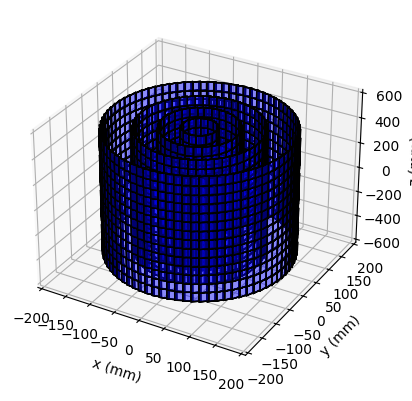

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    

for imodule in inner_barrel.iterrows():
    module = DetectorModule(imodule[1])
    module.draw_xyz(ax, facecolors=volume_colors[imodule[1].volume_id], linewidths=1, edgecolors='k', alpha=.25)

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
ax.set_xlim(-200, 200)
ax.set_ylim(-200, 200)
ax.set_zlim(-600, 600)

# rotate the axes and update
#ax.view_init(azim=0, elev=45)

plt.show()

## Detector display

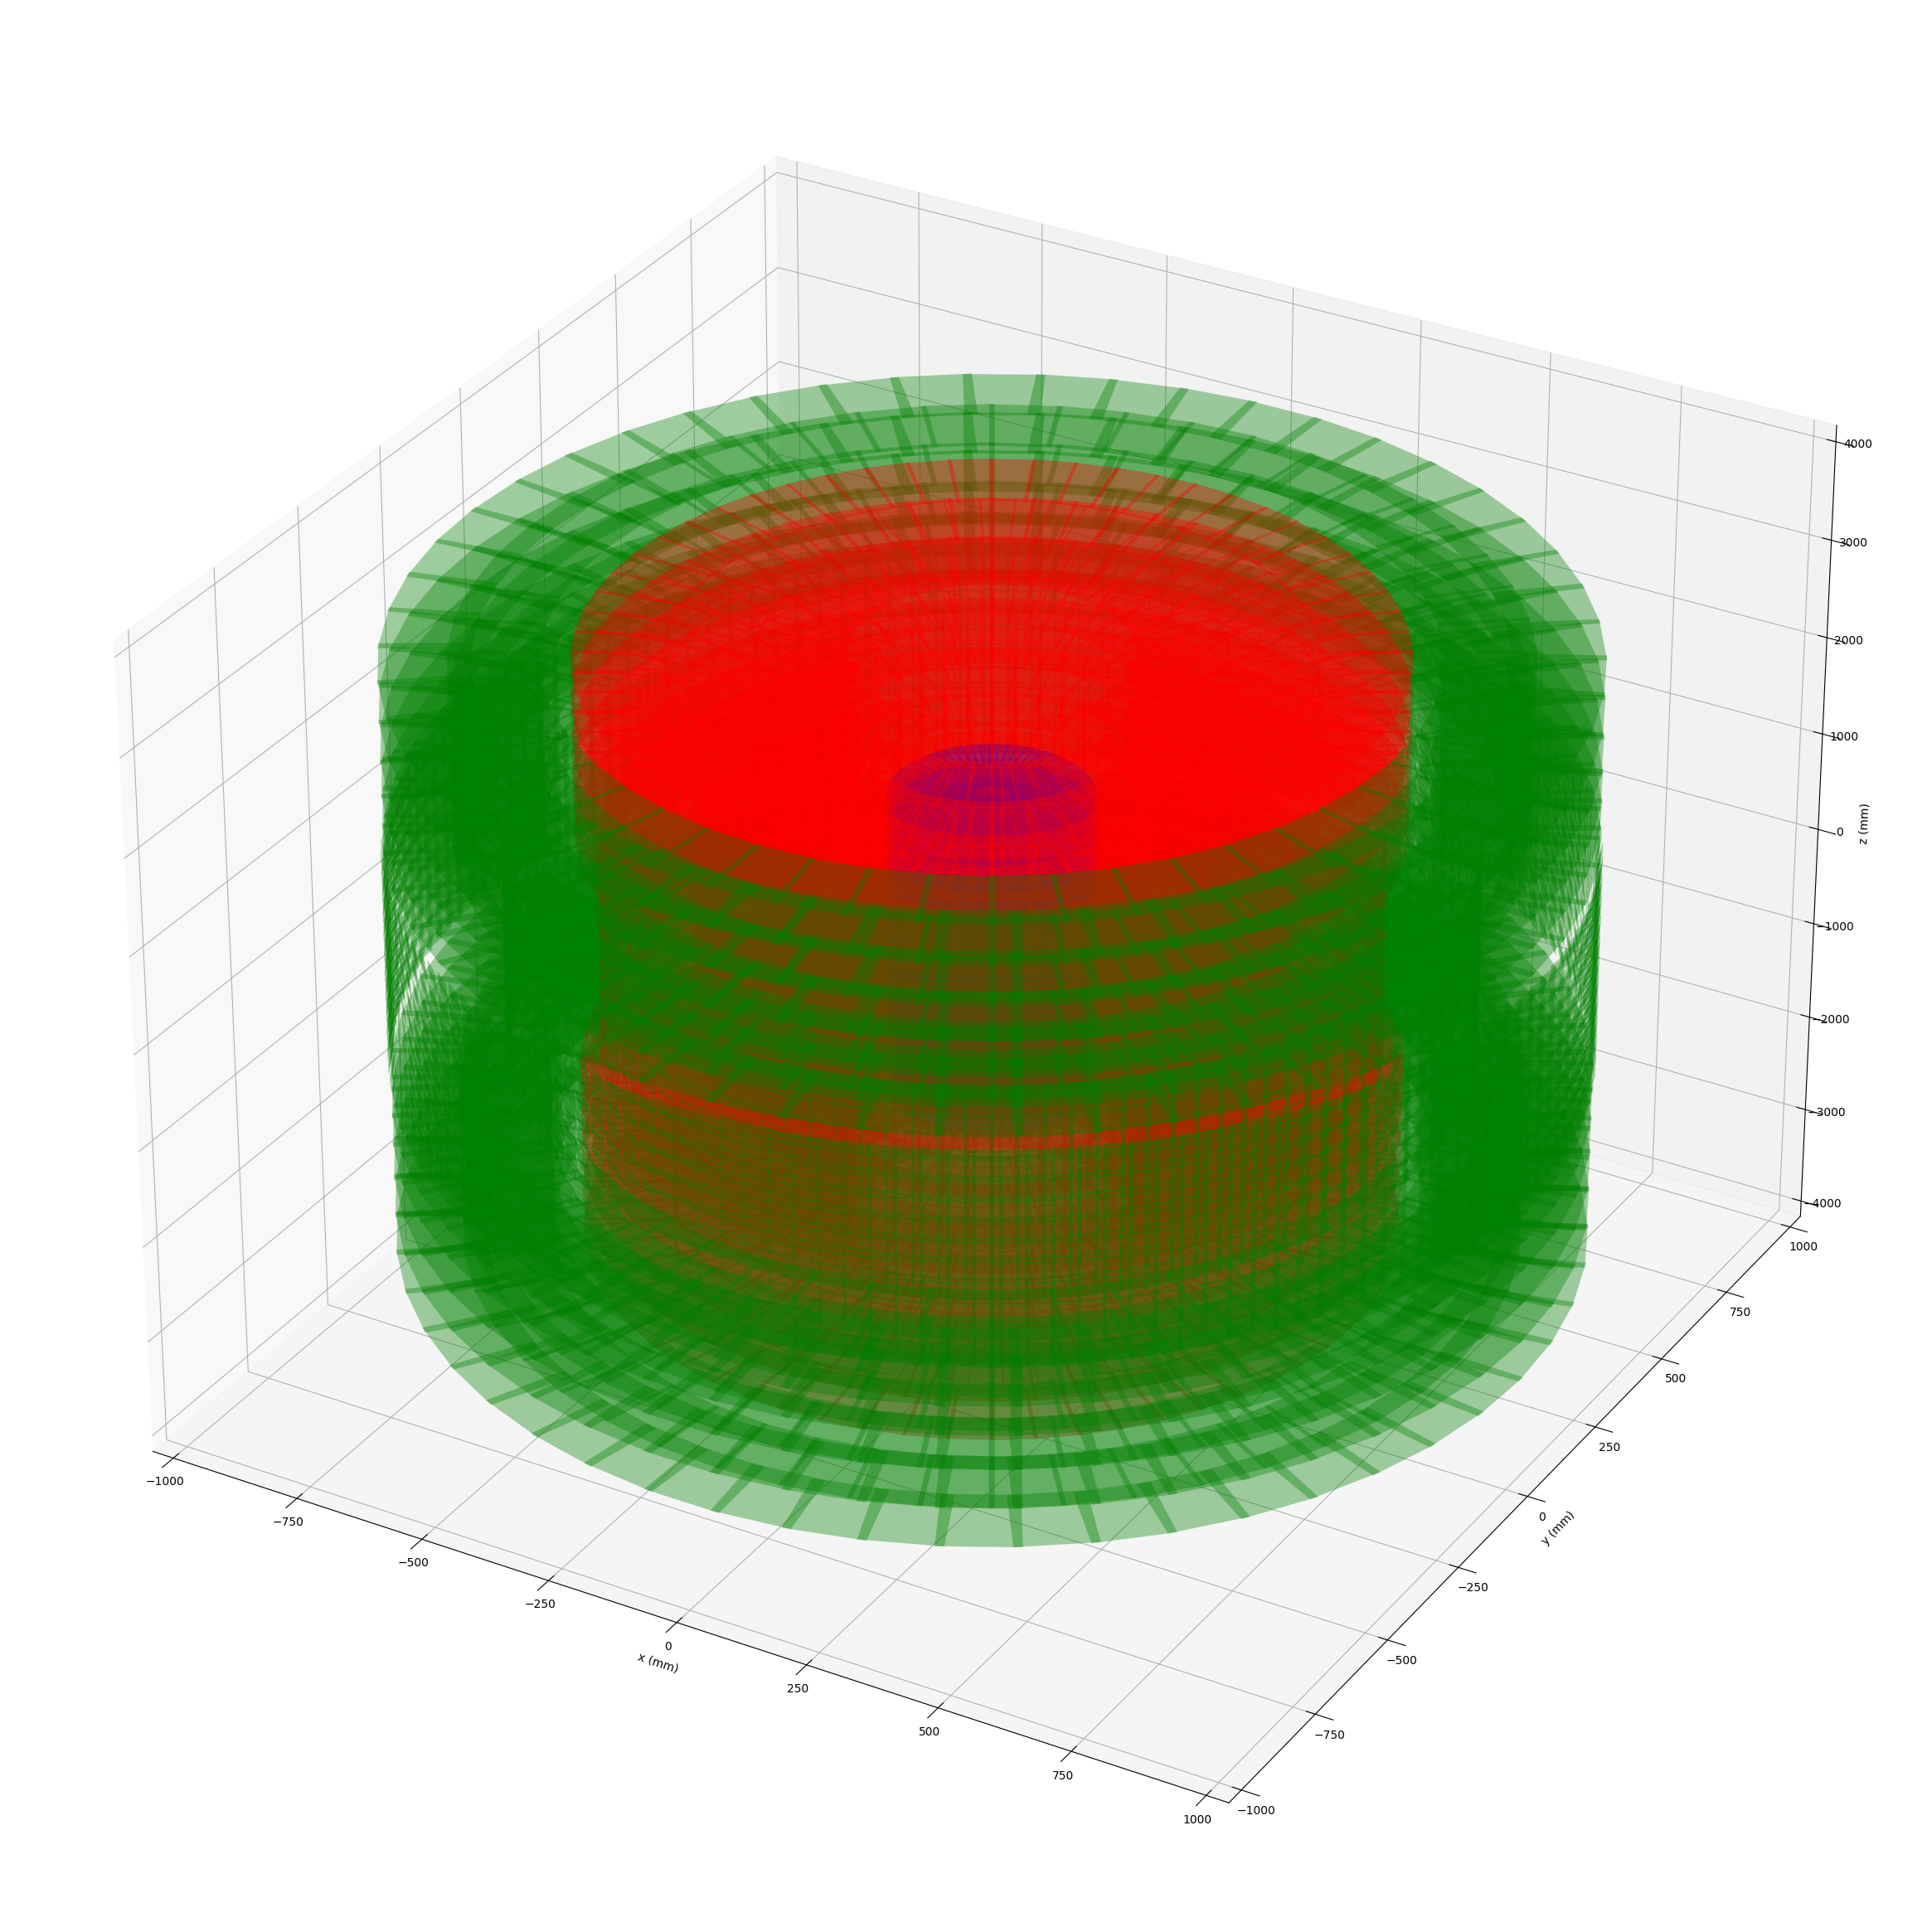

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
    
#detectors_ypos = detectors.query('cy > 0', inplace=False)
#for imodule in detectors_ypos.iterrows():
for imodule in detectors.iterrows():
    module = DetectorModule(imodule[1])
    module.draw_xyz(ax, facecolors=volume_colors[imodule[1].volume_id], linewidths=1, alpha=.2)

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_zlabel('z (mm)')
ax.set_xlim(-1000, 1000)
ax.set_ylim(-1000, 1000)
ax.set_zlim(-4000, 4000)

# put the z axis from left to right and to y axis going away from the viewer

# very big plot
plt.rcParams["figure.figsize"] = (30,30)

plt.show()

## Radial projection of the inner barrel

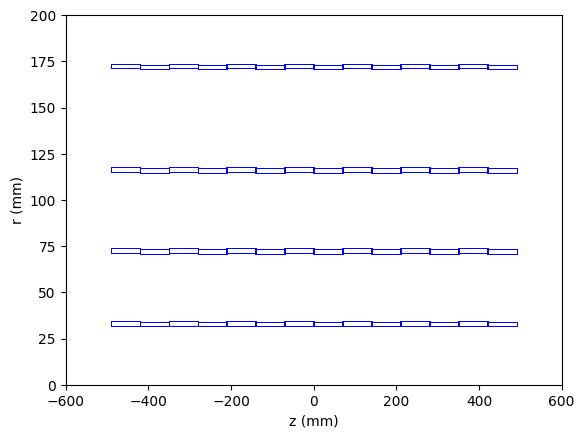

In [7]:
fig, ax = plt.subplots()
for imodule in inner_barrel.iterrows():
    module = DetectorModule(imodule[1])
    module.draw_rz(ax, color=volume_colors[imodule[1].volume_id], linewidth=0.5)

ax.set_xlabel('z (mm)')
ax.set_ylabel('r (mm)')
ax.set_xlim(-600, 600)
ax.set_ylim(0, 200)
plt.show()

## Radial projection of the detector

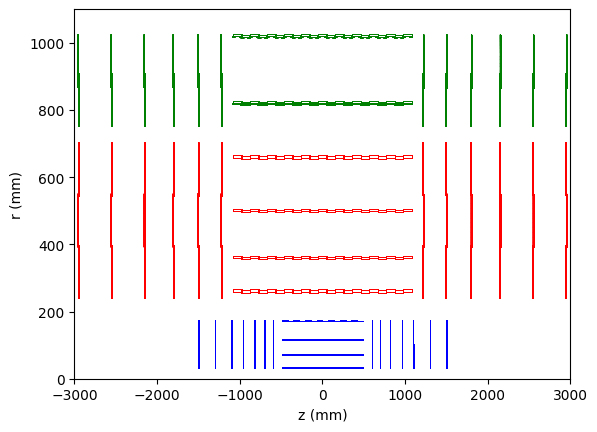

In [8]:
fig, ax = plt.subplots()

for imodule in detectors.iterrows():
    module = DetectorModule(imodule[1])
    module.draw_rz(ax, color=volume_colors[imodule[1].volume_id], linewidth=0.5)

ax.set_xlabel('z (mm)')
ax.set_ylabel('r (mm)')
ax.set_xlim(-3000, 3000)
ax.set_ylim(0, 1100)
plt.show()

## Transverse plane projection of a forward module

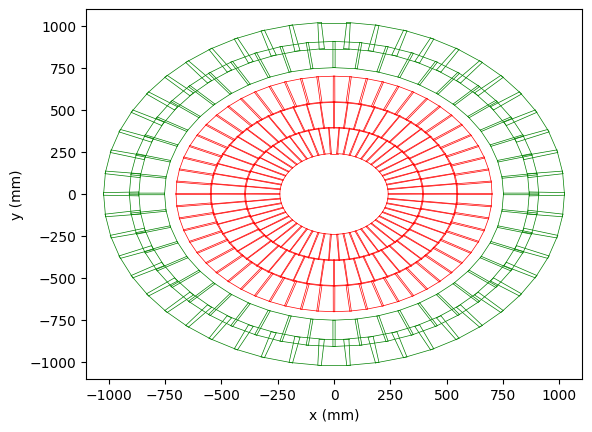

In [9]:
fig, ax = plt.subplots()
for imodule in forward_layer.iterrows():
    module = DetectorModule(imodule[1])
    module.draw_xy(ax, color=volume_colors[imodule[1].volume_id], linewidth=0.5)

ax.set_xlabel('x (mm)')
ax.set_ylabel('y (mm)')
ax.set_xlim(-1100, 1100)
ax.set_ylim(-1100, 1100)
plt.show()

# Detector geometry in a voxel grid

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm.notebook import tqdm

import sys
sys.path.append('/Users/glucia/Projects/DeepLearning/TrackingML')
from core.geometry import DetectorModule, VoxelGrid

In [2]:
detector_file = '../../data/detectors.csv'
voxel_grid = VoxelGrid(detector_file, 150, 2)


Creating submodule dataset...
Calculating normalized positions...
Calculating bounding box...
Generating PCA voxel grid...


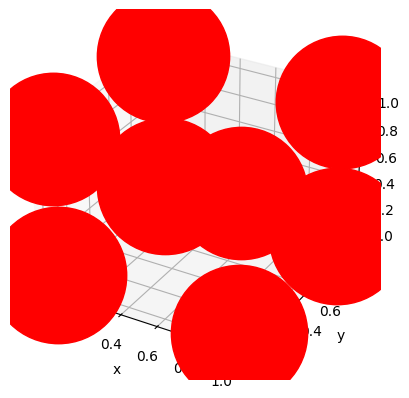

In [3]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for _, isubmodule in voxel_grid.submodule_dataset.iterrows():
    voxel_grid.add_hit_to_grid(isubmodule['cx'], isubmodule['cy'], isubmodule['cz'])

voxel_grid.show(ax)

In [4]:
duplicates = voxel_grid.submodule_dataset.duplicated(subset=['grid_x', 'grid_y', 'grid_z'])

if duplicates.any():
    print('Warning: Some submodules are associated with the same voxel grid point.')
else:
    print('Each submodule is uniquely associated with one voxel grid point.')

In [5]:
# check how many entries of the voxel grid are higher than 0, 1, 2, 3
print('Number of voxels with 0 hits: ', np.sum(voxel_grid.voxel_grid == 0))
print('Number of voxels with 1 hit: ', np.sum(voxel_grid.voxel_grid == 1))
print('Number of voxels with 2 hits: ', np.sum(voxel_grid.voxel_grid == 2))
print('Number of voxels with 3 hits: ', np.sum(voxel_grid.voxel_grid == 3))


Number of voxels with 0 hits:  3374992
Number of voxels with 1 hit:  0
Number of voxels with 2 hits:  0
Number of voxels with 3 hits:  0


Let's try to load an event

In [7]:
event_df = pd.read_csv('../../data/train_1/event000001000-hits.csv')
voxel_grid.reset_grid()

0it [00:00, ?it/s]

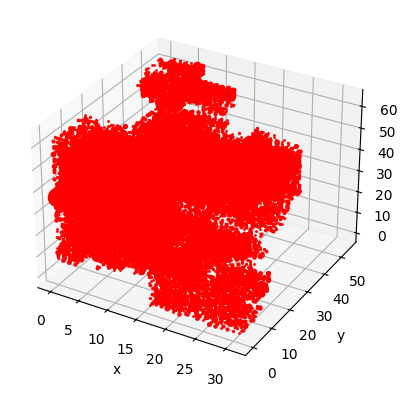

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for _, ihit in tqdm(event_df.iterrows()):
    voxel_grid.add_hit_to_grid(ihit['x'], ihit['y'], ihit['z'])

voxel_grid.show(ax)

0it [00:00, ?it/s]

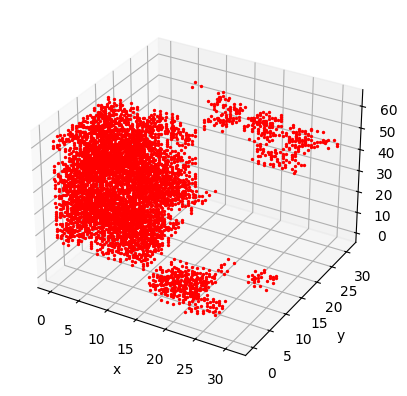

In [9]:
inner_barrel_submodules = voxel_grid.submodule_dataset.query('volume_id == 8')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

voxel_grid.reset_grid()

for _, isubmodule in tqdm(inner_barrel_submodules.iterrows()):
    voxel_grid.add_hit_to_grid(isubmodule['cx'], isubmodule['cy'], isubmodule['cz'])

voxel_grid.show(ax)

In [ ]:
outer_barrel_submodules = voxel_grid.submodule_dataset.query('volume_id == 8')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

voxel_grid.reset_grid()

for _, isubmodule in tqdm(outer_barrel_submodules.iterrows()):
    voxel_grid.add_hit_to_grid(isubmodule['cx'], isubmodule['cy'], isubmodule['cz'])

voxel_grid.show(ax)